In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
data = pd.read_csv('fake_or_real_news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data.shape

(6335, 4)

In [4]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data['length'] = [len(str(text)) for text in data['text']]
data.head()

,title,text,label,length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [7]:
threshold = 50
data.drop(data['text'][data['length']<threshold].index, axis = 0, inplace = True)

In [8]:
data.shape

(6290, 4)

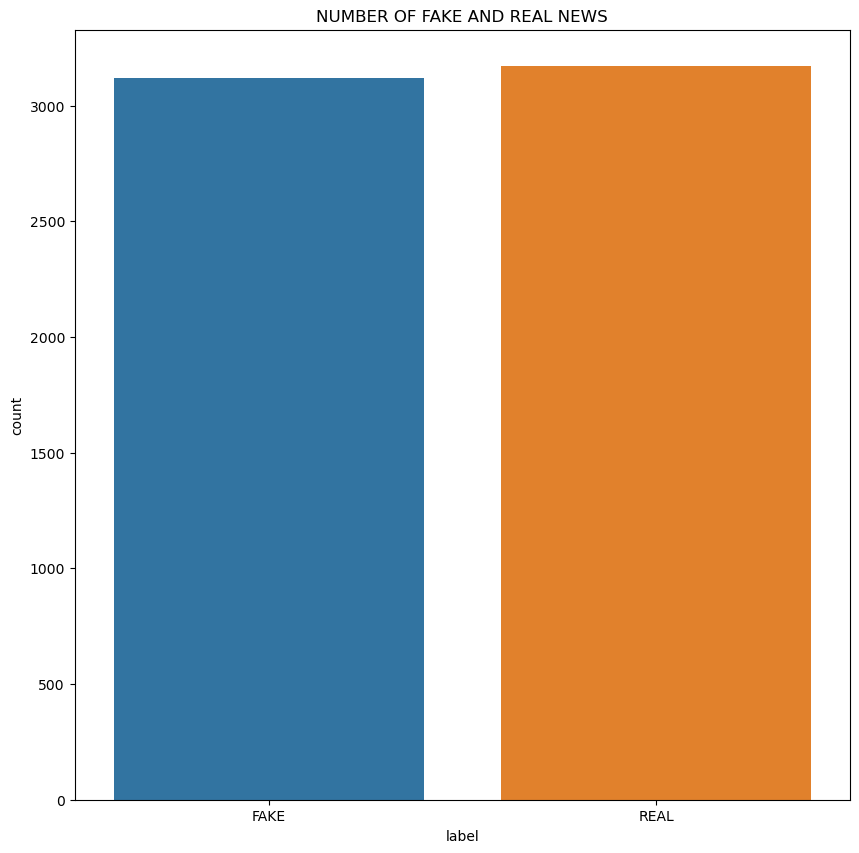

In [9]:
#number of Fake and Real news
plt.figure(figsize = (10, 10))
plt.title("NUMBER OF FAKE AND REAL NEWS")
sns.countplot(x = 'label',data = data)
plt.show()

In [10]:
data.drop('length', axis = 1, inplace = True)
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
x=data['text']
y=data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
tfidf=TfidfVectorizer()
stop_words = 'english'

In [13]:
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [14]:
pac = PassiveAggressiveClassifier()
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier()

In [15]:
y_train_pred = pac.predict(tfidf_train)

In [16]:
y_test_pred = pac.predict(tfidf_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test, y_test_pred)*100

93.85267620561739

In [18]:
confusion_matrix(y_test,y_test_pred) 

array([[882,  65],
       [ 51, 889]], dtype=int64)

In [19]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        FAKE       0.95      0.93      0.94       947
        REAL       0.93      0.95      0.94       940

    accuracy                           0.94      1887
   macro avg       0.94      0.94      0.94      1887
weighted avg       0.94      0.94      0.94      1887



In [23]:
def fake_news():
  sample_news = [input("Enter the news here: ")]
  tfidf_samp_news = tfidf.transform(sample_news)
  sample_pred = pac.predict(tfidf_samp_news)
  print('\n')
  print(sample_pred[0])
while True:
  fake_news()
  ask_user = input("Do you want to check another news? Choose yes/no: ").lower()
  print()
  if (ask_user == "no"):
    break

Enter the news here: Enter the news here: Congratulations! You have just won a grand reward of $1000000, click this link to enter you bank details and claim your cash prize instantly!!!


FAKE
Do you want to check another news? Choose yes/no: no

